<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249S22/)</center>


1. Make sure you fill in all cells contain `YOUR CODE HERE` or `YOUR ANSWER HERE`.
2. After you finished, `Restart the kernel & run` all cell in order.
---------


In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csc249

# Understand filters

As mentioned in warmup, filters utilize one of the core ideas of computer vision: seen image as a tensor.
Moreover, the design of the filter is more subtle because it can discretize the continuous function where you can have all good properties from signal processing(high-pass, low-pass) to handle different types of noises.

## Gaussian kernel

Implement the Gaussian kernel in pixel domain, which is defined as:

$$k(x,y)=\frac{1}{2\pi\sigma^2} \cdot e^\frac{x^2+~y^2}{-2\sigma^2}$$


In [14]:
def gaussian_kernel(shape=(5,5),sigma=5):
    """
    Arguments:
    ----------
        shape : tuple
            size of the filter.
            A 3D numpy.ndarray of shape (h,w).
        sigma : real number
            shapeness of the filter.
    Returns:
    --------
        Gaussian filter with specified shape.
    """
    h = shape[0]
    w = shape[1]
    hH = h // 2
    wH = w // 2
    kernel = np.empty((h,w))
    for i in range(h):
        for j in range(w):
            kernel[i][j] = np.exp(- ((i-wH)**2 + (j-wH)**2) / (2 * (sigma)**2))
    kernel = kernel / (2 * np.pi * (sigma ** 2))
    return kernel
    #raise NotImplementedError()

In [15]:
kernel = gaussian_kernel(shape=(5, 5),sigma=5)

## Kernel surface

#### a. Use `plot_3D` to plot 3d shape of the kernel.
Parameter:
- kernel: generated by the `gaussian_kernel` function with `shape=(15,15), sigma=5`
- X: the x-axis linespace with `kernel.shape[1]` samples, keep 0 at the center. e.g. `[-1,0,1]` for `3x3` kernel
- Y: the y-axis linespace with `kernel.shape[0]` samples, keep 0 at the center. e.g. `[-1,0,1]` for `3x3` kernel

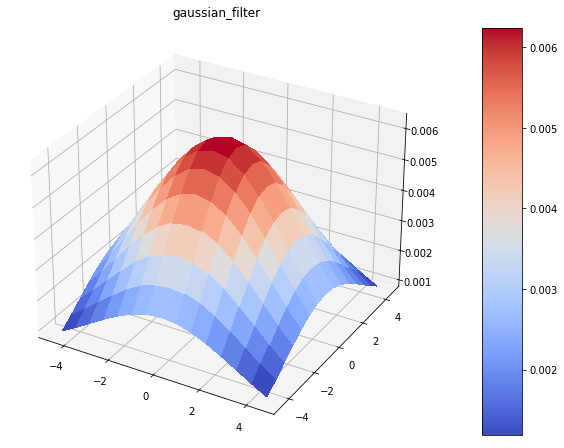

In [16]:
# YOUR CODE HERE
kernel = gaussian_kernel((15, 15), 5)
#raise NotImplementedError()
X=np.linspace(-4.5, 4.5, num=15)
Y=np.linspace(-4.5, 4.5, num=15)
csc249.plot_3D(kernel,X,Y, 'gaussian_filter')

## Different parameters
Plot gaussian with with different parameters and describle the relation between sigma and the kernel shape .  
Sigma sample = `2,5,10`, kernel shape = `10, 20` so you will need to plot six figures.

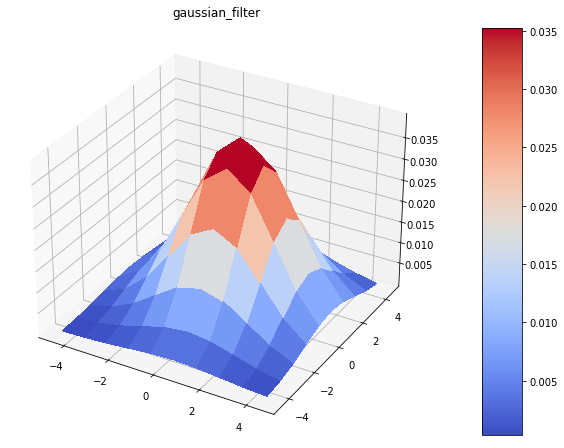

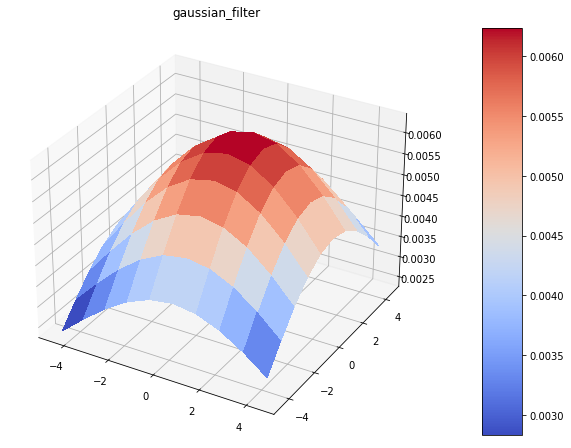

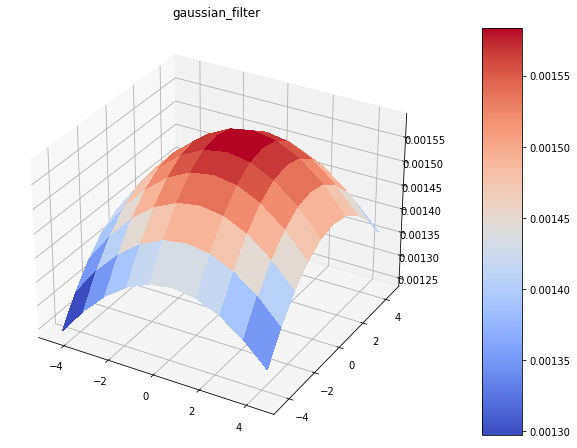

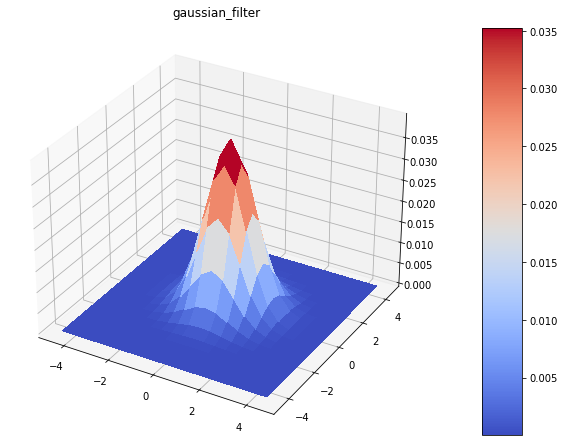

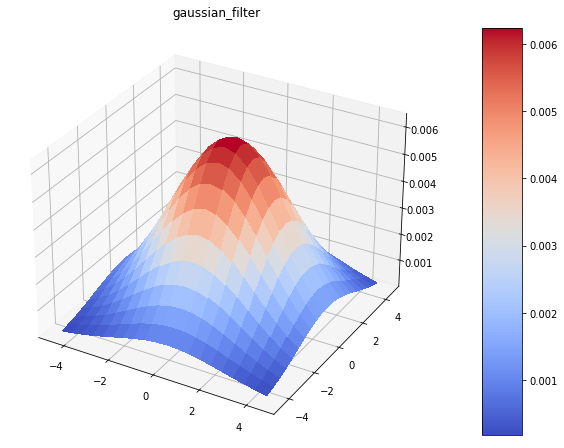

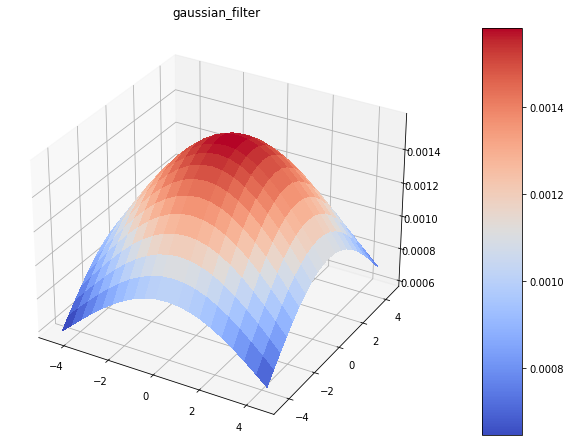

In [17]:
# YOUR CODE HERE
kernel1 = gaussian_kernel((10, 10), 2)
kernel2 = gaussian_kernel((10, 10), 5)
kernel3 = gaussian_kernel((10, 10), 10)
kernel4 = gaussian_kernel((20, 20), 2)
kernel5 = gaussian_kernel((20, 20), 5)
kernel6 = gaussian_kernel((20, 20), 10)

X1=np.linspace(-4.5, 4.5, num=10)
Y1=np.linspace(-4.5, 4.5, num=10)
csc249.plot_3D(kernel1,X1,Y1, 'gaussian_filter')

X2=np.linspace(-4.5, 4.5, num=10)
Y2=np.linspace(-4.5, 4.5, num=10)
csc249.plot_3D(kernel2,X2,Y2, 'gaussian_filter')

X3=np.linspace(-4.5, 4.5, num=10)
Y3=np.linspace(-4.5, 4.5, num=10)
csc249.plot_3D(kernel3,X3,Y3, 'gaussian_filter')

X4=np.linspace(-4.5, 4.5, num=20)
Y4=np.linspace(-4.5, 4.5, num=20)
csc249.plot_3D(kernel4,X4,Y4, 'gaussian_filter')

X5=np.linspace(-4.5, 4.5, num=20)
Y5=np.linspace(-4.5, 4.5, num=20)
csc249.plot_3D(kernel5,X5,Y5, 'gaussian_filter')

X6=np.linspace(-4.5, 4.5, num=20)
Y6=np.linspace(-4.5, 4.5, num=20)
csc249.plot_3D(kernel6,X6,Y6, 'gaussian_filter')

#raise NotImplementedError()

## Smooth methods
Compare different noise and smoothing methods

In [18]:
image = cv2.imread(str(csc249.data/'lena.tiff'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255.0

In [19]:
# generate two image with `gaussian` and `pepper-and-salt` repectively.
# - use `np.random.normal()` to generate gaussian noise
# - use ` np.clip()` to limit the pixel value 
def gassian_noise(img,mean=0,sigma=0.3):
    # YOUR CODE HERE
    noise = np.random.normal(mean, sigma, img.shape)
    newImg = img + noise
    return newImg
    #raise NotImplementedError()

def salt_pepper_noise(img,amount,ratio):
    # ratio: # of salt/# of pepper
    # amount: noise amount, 0.01 = 1% of total pixels will become noise
    # YOUR CODE HERE
    row, col = img.shape
    numPix = amount * (row * col) 
    numPep = int(numPix / (1 + ratio))
    numSalt = int(numPix / (1 + (1/ratio)))
    newImg = img
    for i in range(numPep):
        y_coord = np.random.randint(0, row - 1)
        x_coord = np.random.randint(0, col - 1)
        newImg[y_coord][x_coord] = 0
    for i in range(numSalt):
        y_coord = np.random.randint(0, row - 1)
        x_coord = np.random.randint(0, col - 1)
        newImg[y_coord][x_coord] = 1
    return newImg
    #raise NotImplementedError()

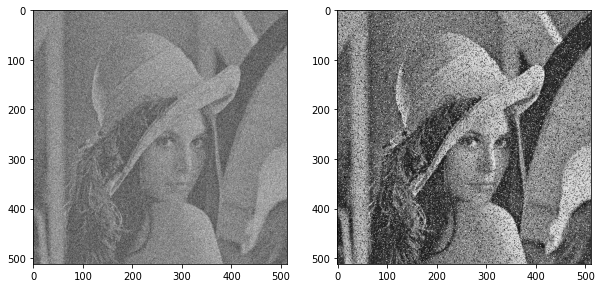

In [20]:
fig, axs = plt.subplots(1,2,figsize=(10,20))
gassian_noise_img=gassian_noise(image,0,0.25)
salt_pepper_noise_img=salt_pepper_noise(image,0.2,0.5)
axs[0].imshow(gassian_noise_img,cmap='gray')
axs[1].imshow(salt_pepper_noise_img,cmap='gray')

In [21]:
# b. implement `median` filter and apply `gaussian` filter and `median` filter 
def median_filter(img,size=3):
    # return the filtered image
    # YOUR CODE HERE
    temp = []
    m = size // 2
    newImg = img
    for i in range(len(newImg)):
        for j in range(len(newImg[0])):
            for k in range(size):
                if (i + k - m < 0) or (i + k - m > len(newImg) - 1):
                    for c in range(size):
                        temp.append(0)
                else:
                    if (j + k - m < 0) or (j + m > len(newImg[0]) - 1):
                        temp.append(0)
                    else:
                        for w in range(size):
                            temp.append(newImg[i + k - m][j + w - m])

            temp.sort()
            newImg[i][j] = temp[len(temp) // 2]
            temp = []
    return newImg
    #raise NotImplementedError()

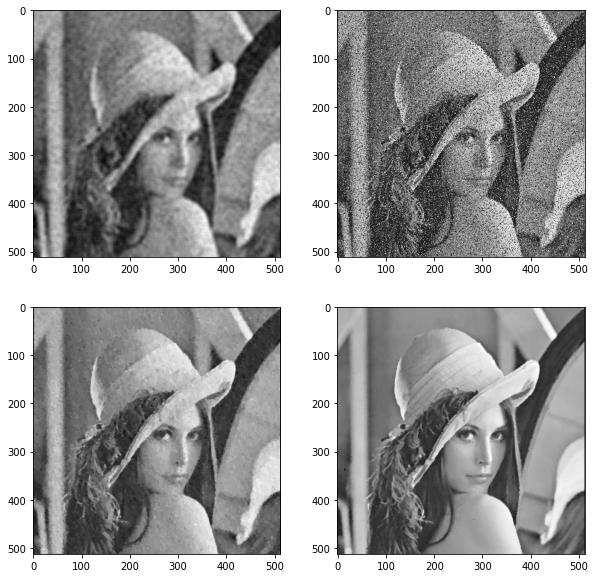

In [22]:
gassian_noise_img=gassian_noise(image,0,0.1)
salt_pepper_noise_img=salt_pepper_noise(image,0.01,0.7)
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].imshow(cv2.filter2D(gassian_noise_img,-1,gaussian_kernel((10,10),5)),cmap='gray')
axs[0,1].imshow(cv2.filter2D(salt_pepper_noise_img,-1,gaussian_kernel((3,3),0.25)),cmap='gray')
axs[1,0].imshow(median_filter(gassian_noise_img),cmap='gray')
axs[1,1].imshow(median_filter(salt_pepper_noise_img),cmap='gray')

# Submission

1. At the menubar, click `Kernel`$\rightarrow$ `Restart & Run All`
2. Download the zip file and upload via blackboard
   
1% deduction of late assignment total score per hour passing the deadline.

In [ ]:
import csc249
csc249.make_submission()